<a href="https://colab.research.google.com/github/mkorlyakova/Ideal-Trader-Model/blob/main/Ideal_Trader_Time_series_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mariya Korlyakova, Co., 2022, mkorlyakova69@gmail.com

# Ideal-Trader-Model

Для обучения биржевого робота на оценку ситуации и генерацию команд "покупка/продажа/нет действий" необходимо иметь комплекс размеченных во времени данных о результатах работы с временной последовательностью значений цены актива и сопутствующих данных. Трейдеры принимают решения опираясь на огромный контекст собственных знаний и наблюдений над текущим положением вещей на рынке. Наиболее простой способ включения в биржевую игру для неопытного агента повторение действий идеального трейдера, даже если есть некоторая небольшая задержка. Однако получение такой информации из реальной среды не всегда возможно, а значит необходимо провести  подготовку данных для обучения на основе "идеализированного" трейдера полностью или частично знающего будующее

### Цель работы:
построить модель обучения биржевого робота на основе "идеальной стратегии трейдера", которую построим на основе анализа исторических данных
Критерий качества работы обучаемого биржевого робота: процент дохода, от дохода "Идеального трейдера"

## Модель идеального трейдера (на постфактах) для генерации учителя биржевого робота

### Входная информация:
  исторические данные о курсе актива(или валюты)
### Стратегия трейдера:
  только игра на повышении цены (покупаем дешево-продаем дорого на пике стоимости) с учетом заданного сбора за операции
### Выход:
  разметка исторической линии цены

### Методика поиска оптимальной разметки:
  скользящее окно W для анализа будущих цен на историческом отрезке и поиск наибольшей доходности в рамках окна.

## Использование учителя:

1) Генерация меток "покупка/продажа/нет действий" во времени на заданном историческом периоде.

2) Обучение модели биржевого робота на основе данных:
  - стоимость конкретных активов
  - показатели экономической активности (открытые источники)
  - стоимость активов "голубых фишек"
  - наблюдения за новостными источниками в исторической ретроспективе (слияния/поглощения/разделения/эмиссия)
  - метки идеального трейдера
3) оценка эффективности: метрика % доходности от дохода "Идеального трейдера"



## Будем строить прогноз стоимости бумаг Яндекс


Открыть биржевые данные ( через YAHoo finance)

In [1]:
import ipywidgets as widgets


In [2]:
#https://github.com/santosjorge/cufflinks

In [3]:
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00


 - https://habr.com/ru/post/507954/

 - https://habr.com/ru/post/487644/

In [4]:
!pip install yfinance

In [5]:
import yfinance as yf

# парсер для yfinance
# https://smart-lab.ru/blog/713289.php


ДЛЯ ОТОБРАЖЕНИЯ ИНФОРМАЦИИ:

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
plt.rcParams['axes.facecolor'] = 'lightgray'


In [8]:
import cufflinks as cf
import plotly.offline

In [9]:
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

# **Получение данных**

### Описание переменных (названия столбцов).

Читаем данные по списку бумаг:

    'YNDX.ME', - Яндекс
    'TTLK.ME', - Нефтепроизводитель
    '^GSPC',   - Газпром
    'AAPL',    - Apple
    'WMT',    
    'IBM',     - IBM
    'MU',      
    'BA',
    'AXP',
    'BTC-USD', - кросс-курс Биткоин -доллар  
    'EURUSD=X', - кросс-курс Евро-Доллар
    'RUB=X'     - кросс-курс Рубль-доллар

In [24]:
# Создаем объект для получения данных
import pandas as pd
tickers_list = ['YNDX.ME','TTLK.ME','^GSPC','AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP','BTC-USD','EURUSD=X','RUB=X']

# запишем данные в таблице
data = pd.DataFrame(columns=tickers_list)

# Получим данные

for ticker in tickers_list:
    data[ticker] = yf.download( ticker,period = 'max')['Adj Close']

# Print first 5 rows of the data
data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,YNDX.ME,TTLK.ME,^GSPC,AAPL,WMT,IBM,MU,BA,AXP,BTC-USD,EURUSD=X,RUB=X
Date,,,,,,,,,,,,
2014-06-04,1170.000000,0.087654,1927.880005,20.450785,63.365078,118.574394,28.517851,116.967697,79.768509,NaN,1.362101,35.049000
2014-06-05,1145.099976,0.088498,1940.459961,20.531021,63.521179,119.519043,28.586761,118.255531,80.628662,NaN,1.360415,34.943501
2014-06-06,1163.000000,0.087817,1949.439941,20.474571,63.430817,119.769684,29.078959,119.491470,82.461929,NaN,1.366195,34.685001
2014-06-09,1172.099976,0.088492,1951.270020,20.802193,63.266499,119.673302,28.547384,119.240868,83.035347,NaN,1.364294,34.397202
2014-06-10,1170.000000,0.087869,1950.790039,20.924290,62.946121,118.432991,29.049425,118.627182,82.783394,NaN,1.359268,34.293201


In [25]:
data.tail()

,YNDX.ME,TTLK.ME,^GSPC,AAPL,WMT,IBM,MU,BA,AXP,BTC-USD,EURUSD=X,RUB=X
Date,,,,,,,,,,,,
2022-05-18,1715.800049,0.5770,3923.679932,139.795364,120.061066,125.002182,70.209351,125.519997,152.668640,28720.271484,1.054786,64.964996
2022-05-19,1705.000000,0.5575,3900.790039,136.350586,116.766083,121.918015,68.578865,127.139999,150.614777,30314.333984,1.047274,64.214996
2022-05-20,1705.000000,0.5575,3901.360107,136.588837,116.893562,120.808479,68.084778,120.699997,149.871506,29200.740234,1.057899,62.090000
2022-05-23,1705.000000,0.5575,3973.750000,142.068680,120.227776,123.337852,68.766624,124.070000,155.544022,29098.910156,1.056982,62.465000
2022-05-24,1705.000000,0.5575,3941.479980,139.338684,121.728180,125.810844,65.831764,119.400002,152.208969,29655.585938,1.068205,58.540001


Рисуем картинки:

- отображаем графики стоимости бумаг по дням
- первичный анализ ситуации

In [26]:
from IPython.display import display,HTML


In [27]:
import pandas as pd
import cufflinks as cf
import numpy as np

In [28]:

%reload_ext autoreload
%autoreload 2

In [29]:
cf.set_config_file(theme='ggplot',sharing='public',offline=False)

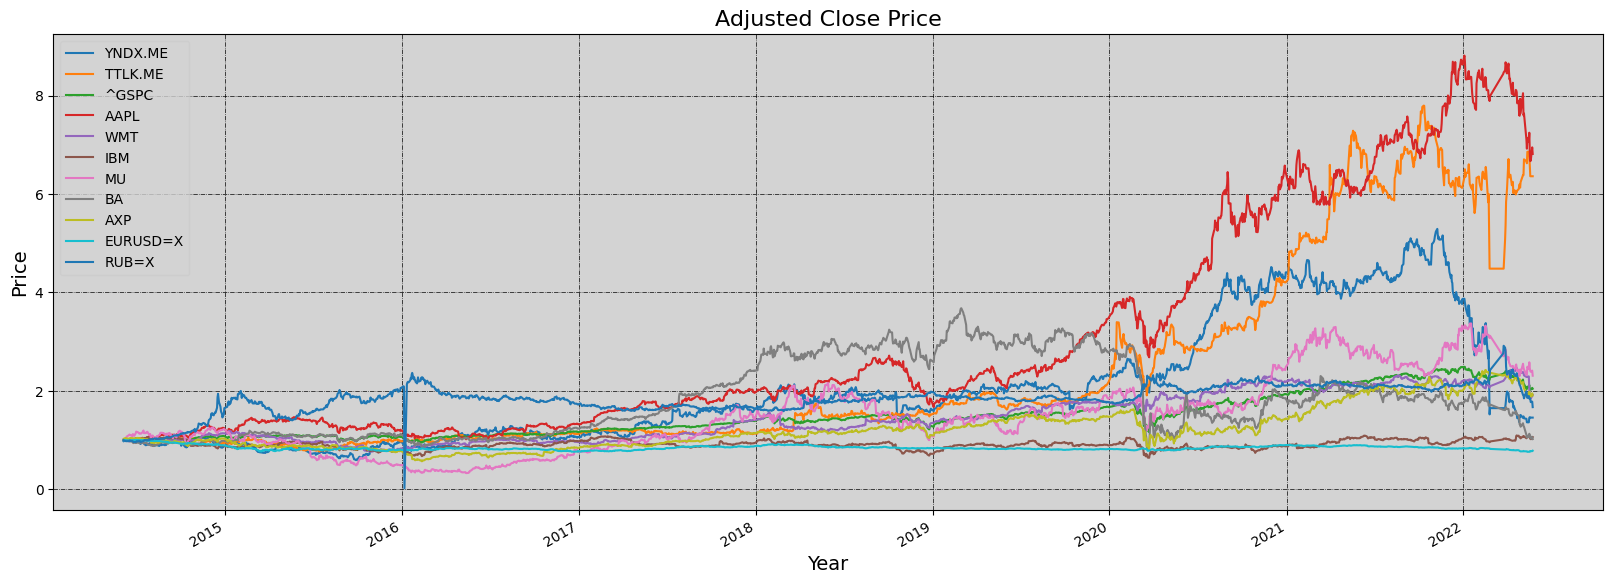

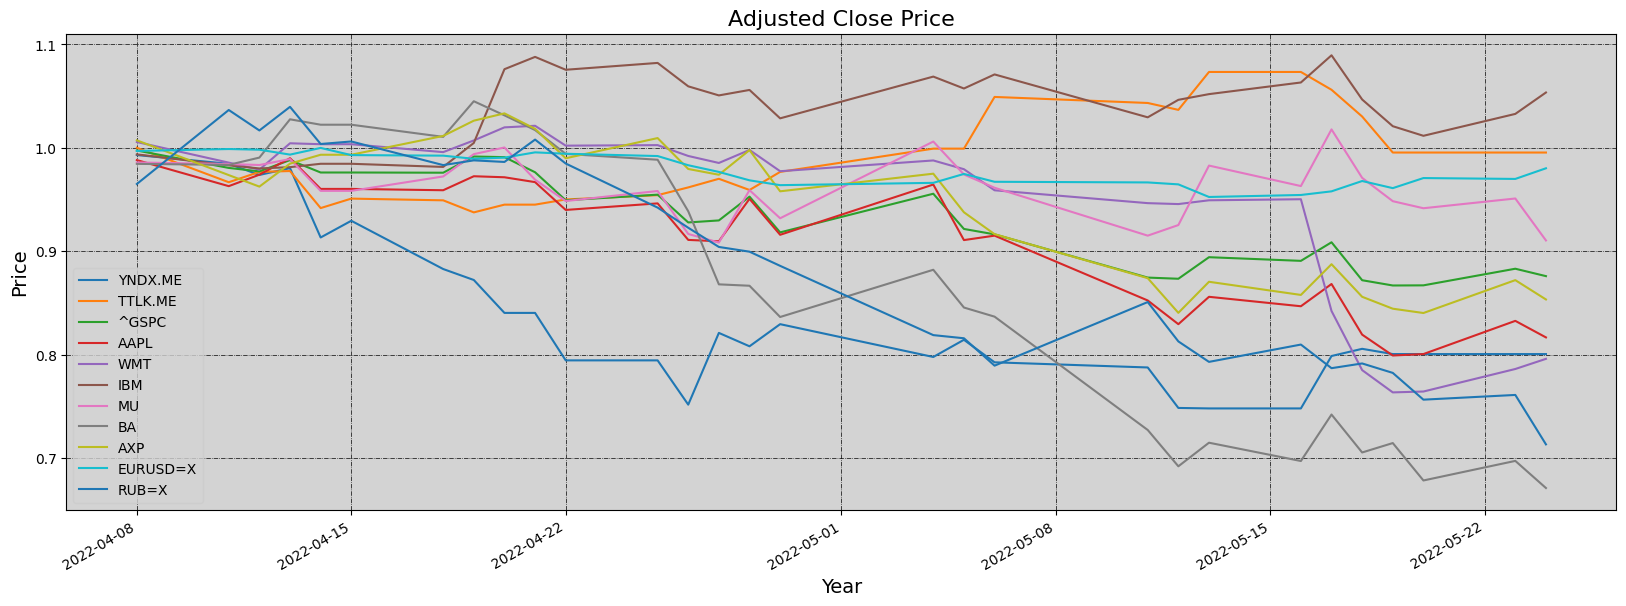

In [30]:
# Plot all the close pricesfigsize=(20,7)

((data.drop('BTC-USD',axis=1).pct_change()+1).cumprod()).plot(figsize= (20,7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


((data.drop('BTC-USD',axis=1).iloc[-30:,:].pct_change()+1).cumprod()).plot(figsize= (20,7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# **Часть 1: Exploratory Data Analysis(EDA):**

## Анализ поведения бумаг Яндекс

Добавим оценку тренда на одном примере:

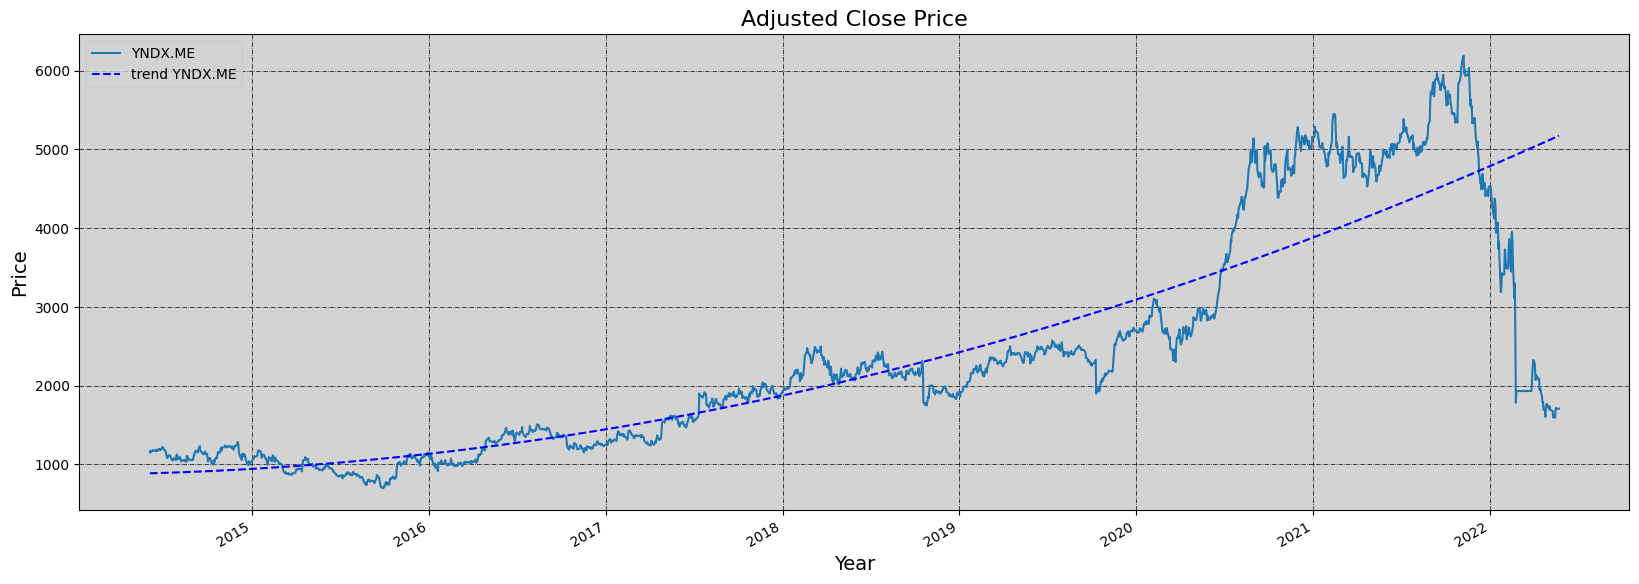

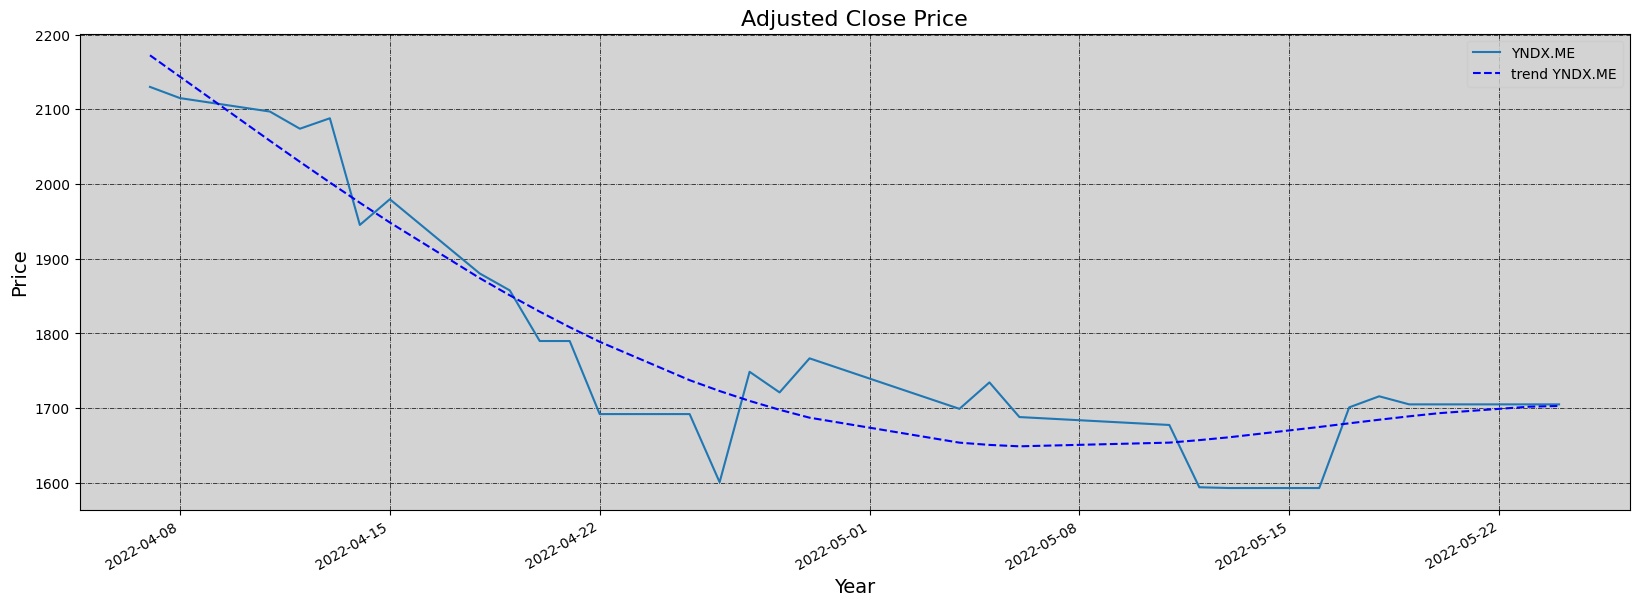

In [40]:
# Plot all the close pricesfigsize=(20,7)

data['YNDX.ME'].plot(figsize= (20,7),  )
x1 = data.index
y_ = data['YNDX.ME'].values.reshape(-1,1)

xp  = x1.to_numpy(dtype='float')/10**19
w = np.polyfit(  xp,y_,2)
p = np.poly1d(w[:,0])
y1 = p(xp)#
plt.plot(x1,y1,'--b', label = 'trend YNDX.ME')

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


data['YNDX.ME'].iloc[-30:].plot(  figsize= (20,7)  )



x = data.index[-30:]
y_ = data['YNDX.ME'].values[-30:].reshape(-1,1)

xp  = x.to_numpy(dtype='float')/10**19
w = np.polyfit(  xp,y_,4)
p = np.poly1d(w[:,0])
y= p(xp)#


plt.plot(x,y,'--b', label = 'trend YNDX.ME')
# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Выводы:
 - Тренд не линейный
 - ряд не стационарный, гетероскедатичный
 - похоже на мультипликативность по тренду
 - нужно перходить к первым разностям (дифференцируем молдель)


## Собираем рабочие данные для анализа

https://aroussi.com/post/python-yahoo-finance

Строим рабочие данные на всем доступном интервале:
  - интервал по текущие сутки
  - полный пакет данных о всех значениях цены и объемов в сутки

In [41]:

Yandex_rus = yf.Ticker("YNDX.ME")



In [55]:
df = Yandex_rus.history(period = 'max')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-06-04 00:00:00+04:00,1546.699951,1546.800049,1163.000000,1170.000000,35146,0.0,0.0
2014-06-05 00:00:00+04:00,1187.300049,1195.000000,1141.099976,1145.099976,25038,0.0,0.0
2014-06-06 00:00:00+04:00,1158.300049,1173.500000,1151.000000,1163.000000,7889,0.0,0.0
2014-06-09 00:00:00+04:00,1178.900024,1185.599976,1155.699951,1172.099976,7304,0.0,0.0
2014-06-10 00:00:00+04:00,1178.900024,1181.000000,1160.099976,1170.000000,3216,0.0,0.0


In [56]:
NQ_ = yf.Ticker('NQ=F')
NQ_df = NQ_.history(period = 'max')
NQ_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-18 00:00:00-04:00,3721.0,3785.5,3602.0,3653.5,72994,0.0,0.0
2000-09-19 00:00:00-04:00,3658.5,3817.0,3656.0,3804.0,70029,0.0,0.0
2000-09-20 00:00:00-04:00,3801.5,3874.0,3715.5,3853.0,78832,0.0,0.0
2000-09-21 00:00:00-04:00,3852.0,3874.0,3744.0,3765.0,70719,0.0,0.0
2000-09-22 00:00:00-04:00,3673.0,3780.0,3615.0,3776.0,55926,0.0,0.0


In [59]:
df.index = pd.Series(df.index.date, name='Date')

Дополняем данные по всем разделам:

In [65]:
data.index = pd.Series(data.index.date, name='Date')

In [66]:
Data_time = df.merge(data, on='Date')
Data_time.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,YNDX.ME,TTLK.ME,^GSPC,AAPL,WMT,IBM,MU,BA,AXP,BTC-USD,EURUSD=X,RUB=X
Date,,,,,,,,,,,,,,,,,,,
2014-06-04,1546.699951,1546.800049,1163.000000,1170.000000,35146,0.0,0.0,1170.000000,0.087654,1927.880005,20.450785,63.365078,118.574394,28.517851,116.967697,79.768509,NaN,1.362101,35.049000
2014-06-05,1187.300049,1195.000000,1141.099976,1145.099976,25038,0.0,0.0,1145.099976,0.088498,1940.459961,20.531021,63.521179,119.519043,28.586761,118.255531,80.628662,NaN,1.360415,34.943501
2014-06-06,1158.300049,1173.500000,1151.000000,1163.000000,7889,0.0,0.0,1163.000000,0.087817,1949.439941,20.474571,63.430817,119.769684,29.078959,119.491470,82.461929,NaN,1.366195,34.685001
2014-06-09,1178.900024,1185.599976,1155.699951,1172.099976,7304,0.0,0.0,1172.099976,0.088492,1951.270020,20.802193,63.266499,119.673302,28.547384,119.240868,83.035347,NaN,1.364294,34.397202
2014-06-10,1178.900024,1181.000000,1160.099976,1170.000000,3216,0.0,0.0,1170.000000,0.087869,1950.790039,20.924290,62.946121,118.432991,29.049425,118.627182,82.783394,NaN,1.359268,34.293201


In [67]:
Data_time.drop('Close',axis=1, inplace=True)
Data_time.sort_index
Data_time.tail()

,Open,High,Low,Volume,Dividends,Stock Splits,YNDX.ME,TTLK.ME,^GSPC,AAPL,WMT,IBM,MU,BA,AXP,BTC-USD,EURUSD=X,RUB=X
Date,,,,,,,,,,,,,,,,,,
2022-05-18,1707.800049,1795.0,1701.800049,321629,0.0,0.0,1715.800049,0.5770,3923.679932,139.795364,120.061066,125.002182,70.209351,125.519997,152.668640,28720.271484,1.054786,64.964996
2022-05-19,1700.000000,1713.0,1640.000000,203895,0.0,0.0,1705.000000,0.5575,3900.790039,136.350586,116.766083,121.918015,68.578865,127.139999,150.614777,30314.333984,1.047274,64.214996
2022-05-20,1705.000000,1705.0,1705.000000,0,0.0,0.0,1705.000000,0.5575,3901.360107,136.588837,116.893562,120.808479,68.084778,120.699997,149.871506,29200.740234,1.057899,62.090000
2022-05-23,1705.000000,1705.0,1705.000000,0,0.0,0.0,1705.000000,0.5575,3973.750000,142.068680,120.227776,123.337852,68.766624,124.070000,155.544022,29098.910156,1.056982,62.465000
2022-05-24,1705.000000,1705.0,1705.000000,0,0.0,0.0,1705.000000,0.5575,3941.479980,139.338684,121.728180,125.810844,65.831764,119.400002,152.208969,29655.585938,1.068205,58.540001


In [68]:
data = Data_time.copy()

In [70]:
data.index =  pd.to_datetime(data.index)

Добавим данные календаря:

In [71]:
data['year'] = data.index.year
data['day_of_week'] = data.index.dayofweek
data['day_of_year'] = data.index.dayofyear
data['month'] = data.index.month
data.head()

,Open,High,Low,Volume,Dividends,Stock Splits,YNDX.ME,TTLK.ME,^GSPC,AAPL,...,MU,BA,AXP,BTC-USD,EURUSD=X,RUB=X,year,day_of_week,day_of_year,month
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-04,1546.699951,1546.800049,1163.000000,35146,0.0,0.0,1170.000000,0.087654,1927.880005,20.450785,...,28.517851,116.967697,79.768509,NaN,1.362101,35.049000,2014,2,155,6
2014-06-05,1187.300049,1195.000000,1141.099976,25038,0.0,0.0,1145.099976,0.088498,1940.459961,20.531021,...,28.586761,118.255531,80.628662,NaN,1.360415,34.943501,2014,3,156,6
2014-06-06,1158.300049,1173.500000,1151.000000,7889,0.0,0.0,1163.000000,0.087817,1949.439941,20.474571,...,29.078959,119.491470,82.461929,NaN,1.366195,34.685001,2014,4,157,6
2014-06-09,1178.900024,1185.599976,1155.699951,7304,0.0,0.0,1172.099976,0.088492,1951.270020,20.802193,...,28.547384,119.240868,83.035347,NaN,1.364294,34.397202,2014,0,160,6
2014-06-10,1178.900024,1181.000000,1160.099976,3216,0.0,0.0,1170.000000,0.087869,1950.790039,20.924290,...,29.049425,118.627182,82.783394,NaN,1.359268,34.293201,2014,1,161,6


# **Часть2. Предсказательное моделирование**

## Строим модели для учителя и прогнозирования

Проблема данных:
  
  - у нас нет разметки, когда нужно покупать, когда продавать
  - получить рвзметку от экспертов трудно

Решение:
  - собрать разметку на исторических данных автоматически путем максимизации прибыли с окном оценки фиксированной длины
  - использовать разметку для обучения модели определять точки входа в покупки/продажи  



In [72]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Ограничения для построения модели:
  - Определим интервал прогноза - 1 день вперед
  - Определим длину явной истории 7 дней





In [73]:
# шаг по данным для построения обучающих примеров
step = 1

# длина прошлого
p = 7
# горизонт предсказания
future = 1
h=future



## **Дополнительная генерация признаков:**

Добавим бесконечные оценки истории - экспоненциальные сглаживания :
  - на 0.01
  - на 0.03
  - на 0.08

In [74]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [75]:

df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
data['exp_0_01'] = exponential_smoothing(data['YNDX.ME'], 0.01)
data['exp_0_03'] = exponential_smoothing(data['YNDX.ME'], 0.03)
data['exp_0_08'] = exponential_smoothing(data['YNDX.ME'], 0.08)


По анализу стоит добавить первые разности. Добавляем первые разности основного ряда

In [76]:
# добавим разности - 1-й порядок
data['diff1'] = 0.0
data['diff1'] = data['YNDX.ME'].diff(1)


data.head()

,Open,High,Low,Volume,Dividends,Stock Splits,YNDX.ME,TTLK.ME,^GSPC,AAPL,...,EURUSD=X,RUB=X,year,day_of_week,day_of_year,month,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-04,1546.699951,1546.800049,1163.000000,35146,0.0,0.0,1170.000000,0.087654,1927.880005,20.450785,...,1.362101,35.049000,2014,2,155,6,1170.000000,1170.000000,1170.000000,NaN
2014-06-05,1187.300049,1195.000000,1141.099976,25038,0.0,0.0,1145.099976,0.088498,1940.459961,20.531021,...,1.360415,34.943501,2014,3,156,6,1169.751000,1169.252999,1168.007998,-24.900024
2014-06-06,1158.300049,1173.500000,1151.000000,7889,0.0,0.0,1163.000000,0.087817,1949.439941,20.474571,...,1.366195,34.685001,2014,4,157,6,1169.683490,1169.065409,1167.607358,17.900024
2014-06-09,1178.900024,1185.599976,1155.699951,7304,0.0,0.0,1172.099976,0.088492,1951.270020,20.802193,...,1.364294,34.397202,2014,0,160,6,1169.707655,1169.156446,1167.966768,9.099976
2014-06-10,1178.900024,1181.000000,1160.099976,3216,0.0,0.0,1170.000000,0.087869,1950.790039,20.924290,...,1.359268,34.293201,2014,1,161,6,1169.710578,1169.181753,1168.129426,-2.099976


Посмотрим на признаки по итогам первичной обработки

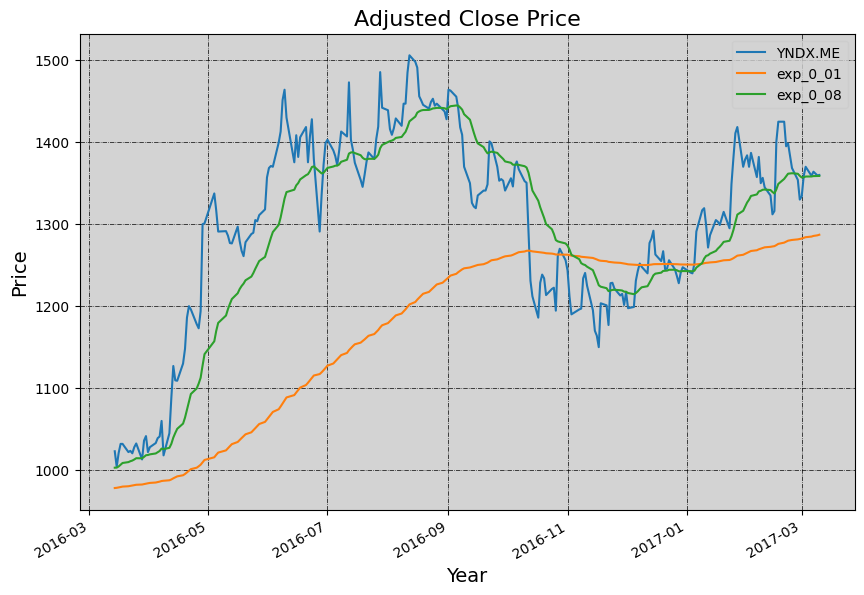

In [77]:
# Plot all the close prices
data.loc['2016-03-12':'2017-03-12',['YNDX.ME','exp_0_01','exp_0_08']].plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Сбросим бракованные данные (не полные и Nan)

In [78]:
data = data.iloc[p+1:,:]

In [79]:
data.fillna(0, inplace=True)

## Строим модель учитель - Идеального трейдера

In [80]:
from scipy.signal import find_peaks, argrelextrema,find_peaks_cwt
import numpy as np

# Учитель для потока данных data
  - с окном знания постистории w (по умолчанию 30)
  - delta = 0.001, - коммиссия 0.1%
  - verbose = 0, - делать визуализацию (1) не делать (0)
  - V = 100, - начальный капитал
  - name = ''

In [111]:
def bay_sale(data = None,w = 30, delta = 0.001, verbose = 0, V = 100, name = ''):
  if data.shape[0]>0:
    x = data.values
    #peaks, _ = find_peaks(x, threshold = delta)
    peaks  = find_peaks_cwt(data, np.arange(1,w))
    peaks_max = argrelextrema(x, np.greater)
    peaks_min = argrelextrema(x, np.less)
    #print(peaks)
    if verbose:
      plt.figure(figsize=(16,16))
      plt.subplot(4,1,1)
      plt.plot(data.index,x)
      plt.plot(data.index[peaks], x[peaks], "x")
      plt.plot(data.index[peaks_max], x[peaks_max], "or", label = 'sale')
      plt.plot(data.index[peaks_min], x[peaks_min], "og", label = 'bay')
      plt.legend()
      plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
      plt.title('курс ' + name)

    p_min_max = np.hstack([np.array(peaks_max),np.array(peaks_min)])
    #print(p_min_max[0])

    peaks_all = p_min_max[0].tolist()
    peaks_all.sort()
    #print(peaks_all)
    k = 0 # номер текушего начала позиции
    s = 0 # чило точек вперед по позициям
    all_sum = 0 #  общий доход

    Invest0 = V # начальная инвестиция
    Invest = Invest0 # текущий инвест счет
    logger_bay_sale = np.zeros(shape =  (data.shape[0],1) )
    #logger_bay_sale[peaks_min] = 1
    #logger_bay_sale[peaks_max] = -1
    Profeat = Invest0 # доход
    prof = []
    #print('sale :', k,'prof: ', Profeat)
    for i in peaks_all:
      #print(i)
      diff_sum = Invest0/x[k]*(x[i])-Invest0

      #print(k,i, delta*Invest0*diff_sum, Invest,Profeat)
      if (Invest==0)&(diff_sum > delta*Invest0)& (x[i]>0):

        Profeat = Profeat +  diff_sum - delta*Invest0 #+Invest0

        logger_bay_sale[i] = -1
        #print('sale :', i,'prof: ', Profeat, logger_bay_sale[i])
        Invest = Invest0
        k = i

      #if (Invest==0) & (diff_sum <= delta*Invest0) & (diff_sum>0) & (k != i)& (x[i]>0):
        #print('no sale :', k)

      if (Invest>0)  & (diff_sum >=0)& (k != i) & (x[i]>0):
        #print('no bay :', k)
        k = i


      if (Invest>0) & (k != i) & (diff_sum <  0) & (x[i]>0):

        Profeat = Profeat # - Invest0
        logger_bay_sale[i] = 1
        #print('bay: ',i,'prof: ', Profeat, logger_bay_sale[i])

        k = i
        Invest = 0



      prof.append([i,Profeat])


    prof = np.array(prof)
    #print(prof[:,1],data.index[peaks_all])
    if verbose:
      plt.subplot(4,1,2)
      plt.plot(data.index[peaks_all], prof[:,1] , "-b", label = 'общий доход')
      plt.legend()
      plt.title('общий доход трейдера')
      plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
      plt.subplot(4,1,4)
      dprof = prof[1:,1]-prof[:-1,1]
      dprof = pd.DataFrame(data = dprof, index =data.index[peaks_all[:-1]], columns = ['prof'] )
      dprof['w7'] = dprof['prof'].rolling(7).sum()
      dprof['w7_std'] = dprof['prof'].rolling(7).std()
      plt.bar(data.index[peaks_all[:-1]], dprof['prof']  ,  label = 'доход на каждой операции')
      plt.plot(data.index[peaks_all[:-1]], dprof['w7']  , "-b", label = 'доход на неделе')
      plt.plot(data.index[peaks_all[:-1]], dprof['w7'] + dprof['w7_std']  , "-g", label = 'разброс доход на неделе')
      plt.plot(data.index[peaks_all[:-1]], dprof['w7'] - dprof['w7_std']  , "-g")
      plt.fill_between(data.index[peaks_all[:-1]], dprof['w7'] - dprof['w7_std'], dprof['w7'] + dprof['w7_std'], alpha=0.5)
      plt.title('Статистические оценки работы трейдера')
      plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
      #plt.plot(data.index[peaks_all[:-1]], dprof['w7_std']  , "-k")

      plt.legend()
      plt.subplot(4,1,3)
      plt.plot(data.index, logger_bay_sale, "--b" , label = 'разметка трейдера')
      plt.legend()
      plt.title('акты покупки и продажи  (-1 : продажа, 0: нет действий, 1:покупка)')
      plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
      plt.show()


    return   logger_bay_sale, prof


Построим разметку идеального трейдера для Яндекс данных

- можно поменять размер окна постистории, которую видит учитель через slider




In [112]:
slider = widgets.IntSlider(30, min=1, max=100)
slider

IntSlider(value=30, min=1)

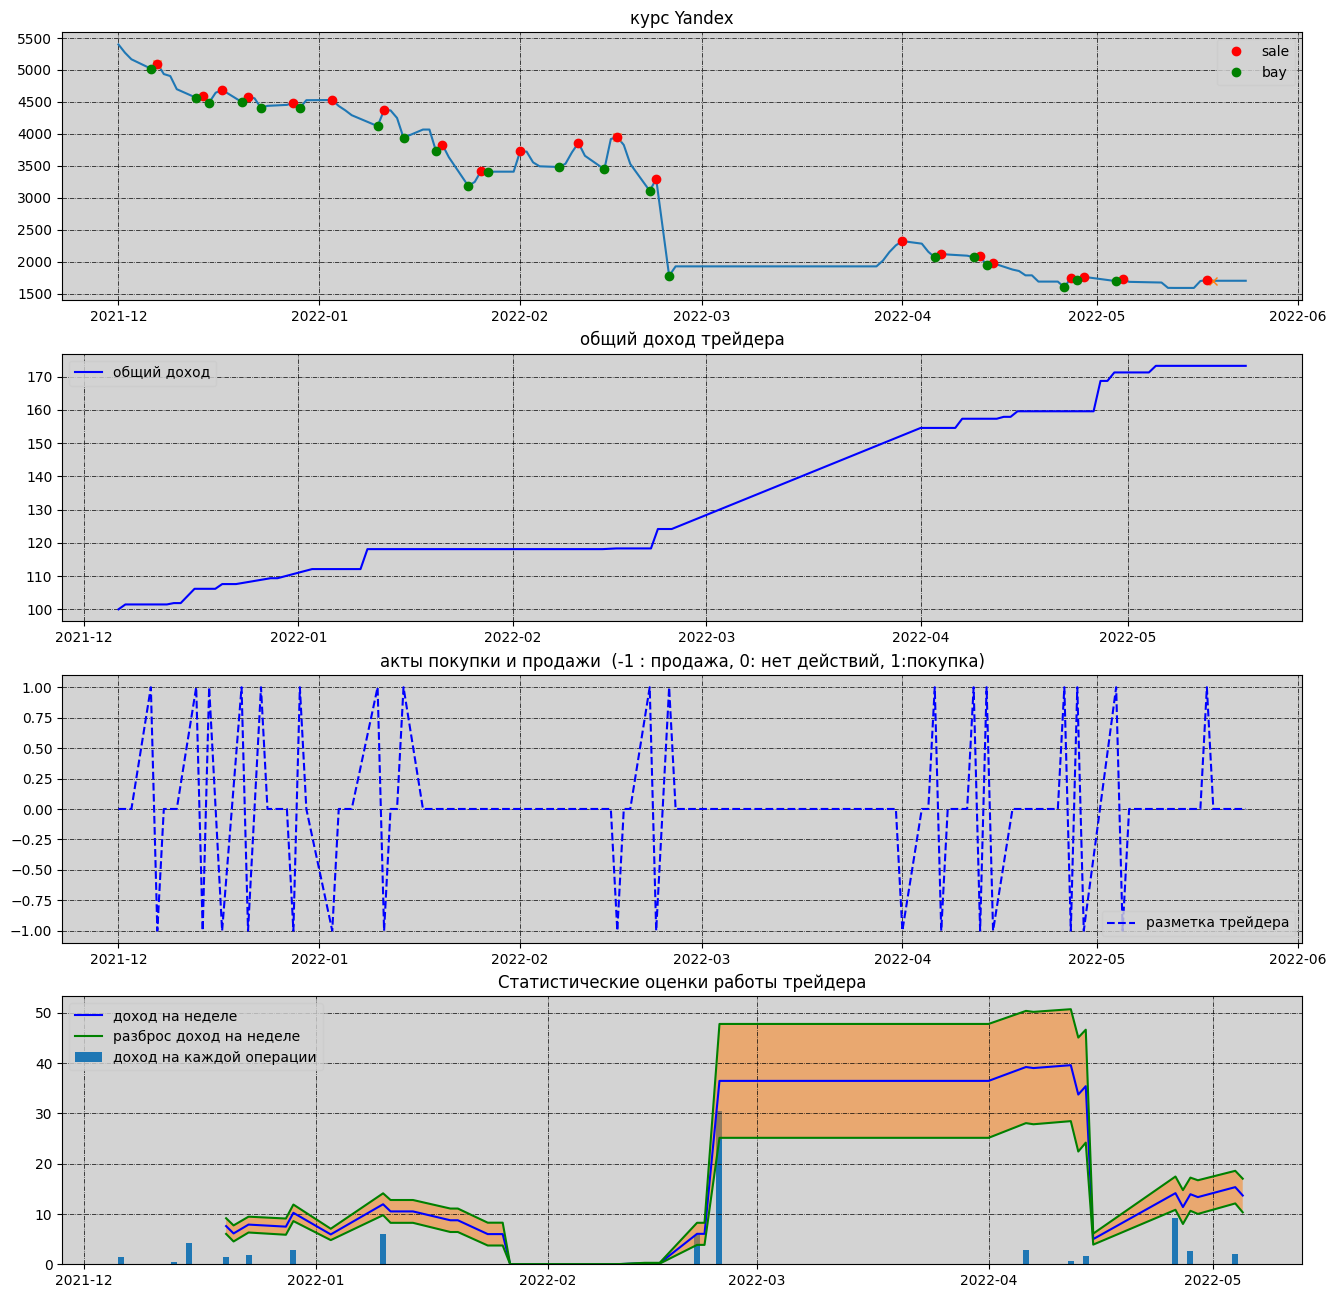

In [113]:
# Строим данные



logger_sb,prof = bay_sale(data = data['YNDX.ME'].iloc[-100:], name = 'Yandex', w = slider.value, delta = 0.001 ,verbose = 1, )

In [114]:
y,prof_y = bay_sale(data = data['YNDX.ME'], delta = 0.001 ,verbose = 0)


### Добавляем метки от учителя

In [115]:
data['A1'] = y


In [116]:
#y = np.hstack([y,ya])
y.shape

(1976, 1)

### Строим модель биржевого робота по учителю

In [117]:
from tensorflow.keras import utils
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM

from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [118]:
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import numpy as np

Учитель строит 3 типа ответов:
  - 1 - купить
  - -1 - продать
  - 0 - ничего не делать




In [120]:
yr =utils.to_categorical(y+1).reshape((y.shape[0],3))
print(yr.shape)

X = data.copy()

(1976, 3)


Задаем длину истории, которую видит биржевой робот: р = 7

In [121]:

# длина истории для работы
xLen = p

In [122]:
y_target = yr[xLen+h:,:]
X_ = X.iloc[:-h,:]

print(y_target[-10:,-3:])
print(X_.tail(10))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
                   Open         High          Low  Volume  Dividends  \
Date                                                                   
2022-05-06  1734.000000  1734.000000  1655.000000  200402        0.0   
2022-05-11  1688.000000  1728.599976  1634.000000  255646        0.0   
2022-05-12  1694.800049  1694.800049  1543.599976  259926        0.0   
2022-05-13  1604.599976  1624.599976  1574.199951  121145        0.0   
2022-05-16  1593.000000  1593.000000  1593.000000       0        0.0   
2022-05-17  1653.000000  1707.000000  1649.800049  204920        0.0   
2022-05-18  1707.800049  1795.000000  1701.800049  321629        0.0   
2022-05-19  1700.000000  1713.000000  1640.000000  203895        0.0   
2022-05-20  1705.000000  1705.000000  1705.000000       0        0.0   
2022-05-23  1705.000000  1705.000000  1705.000000       0        0.0   

            St

Собираем последовательности для обучения:

In [123]:
X_data = []
X_net_data = []
for i in range(y_target.shape[0]):
  X_data.append(X_.iloc[i:i+xLen+1,:].values.reshape(-1))
  X_net_data.append(X_.iloc[i:i+xLen+1,:].values)
X_data = np.array(X_data)
X_net_data = np.array(X_net_data)

In [124]:
y_target[-10,:]

array([0., 1., 0.], dtype=float32)

In [125]:
X_net_data[-9,:,-3:]

array([[ 2.11010182e+03, -9.11999512e+01,  1.00000000e+00],
       [ 2.08118167e+03,  1.47799927e+02, -1.00000000e+00],
       [ 2.05236714e+03, -2.75999756e+01,  1.00000000e+00],
       [ 2.02950576e+03,  4.55999756e+01, -1.00000000e+00],
       [ 2.00306530e+03, -6.75999756e+01,  1.00000000e+00],
       [ 1.98157208e+03,  3.54000244e+01, -1.00000000e+00],
       [ 1.95808631e+03, -4.64000244e+01,  0.00000000e+00],
       [ 1.93563141e+03, -1.05999756e+01,  0.00000000e+00]])

In [126]:
print(X_net_data.shape)
print(X_data.shape)
print(y_target.shape)

(1968, 8, 27)
(1968, 216)
(1968, 3)


In [127]:
# Строим данные для тестов(hold_out) и тренировки


train_split = -300
# вычисляем точку разделения ряда на тесты и тренировку
#train_split = data_f.shape[0] - valLen - bias
# делим
train_data = X_data[ : train_split - 1,:]
val_data = X_data[train_split:,:]
train_data[:5,-3:]


array([[ 1.17639890e+03,  0.00000000e+00,  0.00000000e+00],
       [ 1.17969499e+03,  3.25999756e+01,  0.00000000e+00],
       [ 1.18277539e+03,  5.99975586e-01, -1.00000000e+00],
       [ 1.18415336e+03, -1.81999512e+01,  0.00000000e+00],
       [ 1.18478109e+03, -8.00000000e+00,  0.00000000e+00]])

Стандартизация данных:

In [128]:
#chanel = [0,2,3,5]
chanel = [0,1,2]
xTrain = train_data
yTrain = y_target[0:train_split - 1,chanel]



xVal = val_data
yVal = y_target[train_split :,chanel]

scx = StandardScaler()
xTrains = scx.fit_transform(xTrain[:,:-2])
xTrains =np.hstack([xTrains, xTrain[:,-2:]])
xVals = scx.transform(xVal[:,:-2])
xVals =np.hstack([xVals ,xVal[:,-2:]])


In [129]:
xTrain[:5,:],xTrains[:15,:4]

(array([[ 1.18009998e+03,  1.18500000e+03,  1.17600000e+03, ...,
          1.17639890e+03,  0.00000000e+00,  0.00000000e+00],
        [ 1.17600000e+03,  1.18269995e+03,  1.16500000e+03, ...,
          1.17969499e+03,  3.25999756e+01,  0.00000000e+00],
        [ 1.16519995e+03,  1.17900000e+03,  1.16000000e+03, ...,
          1.18277539e+03,  5.99975586e-01, -1.00000000e+00],
        [ 1.19309998e+03,  1.21880005e+03,  1.18500000e+03, ...,
          1.18415336e+03, -1.81999512e+01,  0.00000000e+00],
        [ 1.20000000e+03,  1.20890002e+03,  1.19100000e+03, ...,
          1.18478109e+03, -8.00000000e+00,  0.00000000e+00]]),
 array([[-0.75494706, -0.76973248, -0.74029856, -0.34172115],
        [-0.75882736, -0.77188317, -0.7508312 , -0.34179843],
        [-0.76904875, -0.77534285, -0.75561876, -0.34011613],
        [-0.74264358, -0.73812736, -0.73168094, -0.32532963],
        [-0.73611325, -0.74738449, -0.72593587, -0.33857938],
        [-0.75021495, -0.76038187, -0.76222562, -0.3384634

In [130]:
print(xTrains.shape)

print(yTrain.shape)


print(xVals.shape)

print(yVal.shape)

(1667, 216)
(1667, 3)
(300, 216)
(300, 3)


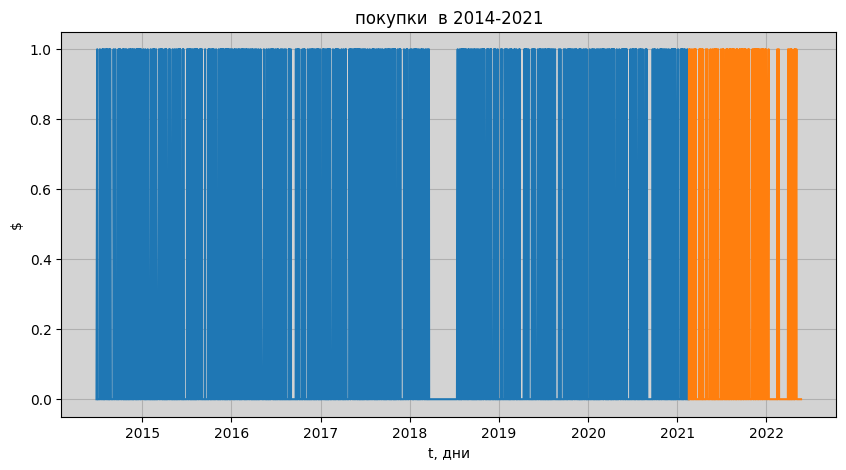

In [131]:
plt.figure(figsize=(10,5))
plt.plot(X_.index[p:train_split-1],yTrain[:,0])
plt.plot(X_.index[train_split:],yVal[:,0])
plt.grid('on')
plt.xlabel('t, дни')
plt.ylabel('$')
plt.title('покупки  в 2014-2021')
plt.show()

In [132]:
n_class = yVal.shape[1]

Определим метрику

In [133]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Обучим базовую модель (ГрадиентБустинг)
gb = GradientBoostingClassifier(max_depth=10, random_state=0, n_estimators=200)
model_gb = MultiOutputClassifier(GradientBoostingClassifier(max_depth=10, random_state=0, n_estimators=200)).fit( xTrains, yTrain )
#model_gb.fit( xTrains, yTrain )


Проверка базовой модели на валидационных данных:

0
1
2


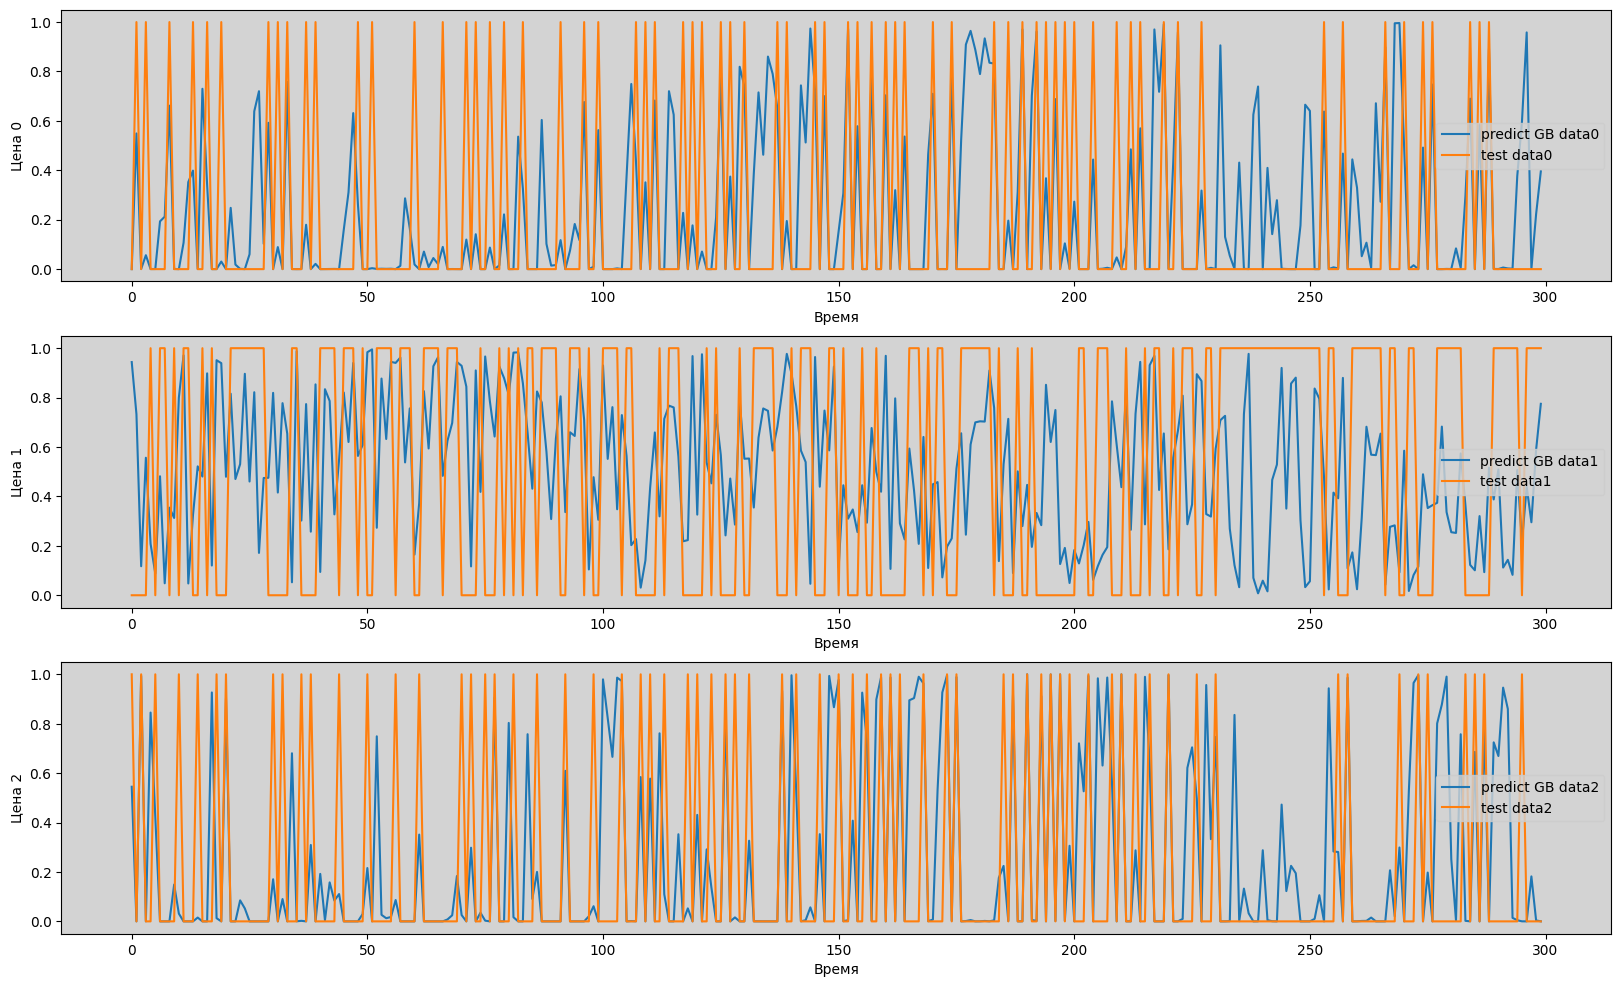

ошибка градиентного бустинга :   24.61498355276092 %


In [134]:
X_test_pred_gb = model_gb.predict_proba(xVals)
yt=yVal
yp=X_test_pred_gb

plt.figure( figsize=( 20, 4*n_class ))
for i in range(n_class):
  print(i)
  plt.subplot( n_class,1,i+1)
  plt.xlabel('Время')
  plt.ylabel('Цена '+str(i))
  plt.plot(yp[i][:,1], label='predict GB data'+str(i) )
  plt.plot(yt[:,i], label='test data'+str(i))


  plt.legend()
plt.show()

er_g = np.mean(np.abs(yt[:,0] - yp[0][:,1]))*100
print('ошибка градиентного бустинга :  ', er_g, '%')

Оценка линейной модели для биржевого робота

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



0
1
2


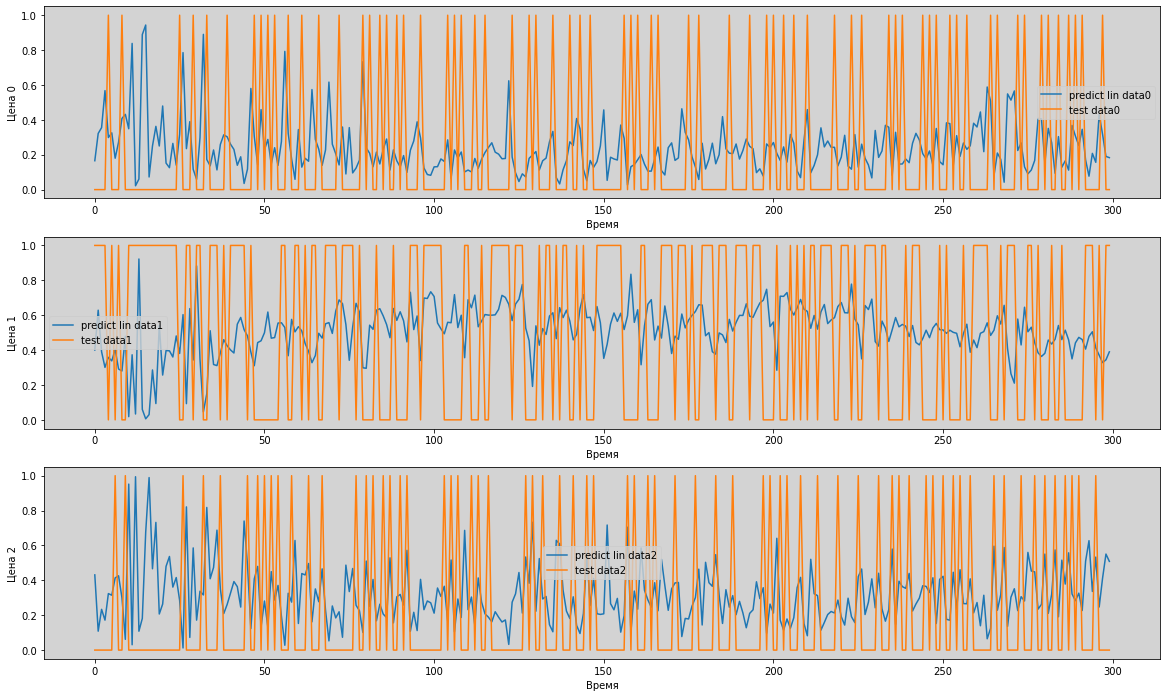

ошибка линейной модели :   34.91358586863761 %


In [ ]:
solver = 'saga'

model_l = MultiOutputClassifier(LogisticRegression( multi_class ='ovr', solver = solver, penalty='l1', max_iter=1000)).fit( xTrains, yTrain )

X_test_pred_l = model_l.predict_proba(xVals)
yt=yVal
yp=X_test_pred_l

plt.figure( figsize=( 20, 4*n_class ))
for i in range(n_class):
  print(i)
  plt.subplot( n_class,1,i+1)
  plt.xlabel('Время')
  plt.ylabel('Цена '+str(i))
  plt.plot(yp[i][:,1], label='predict lin data'+str(i) )
  plt.plot(yt[:,i], label='test data'+str(i))


  plt.legend()
plt.show()

er_l = np.mean(np.abs(yt[:,0] - yp[0][:,1]))*100

print('ошибка линейной модели :  ', er_l, '%')

Оценка нейросетевой модели для биржевого робота

In [ ]:
batch_size = 32


dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    xTrains[:-xLen+1,:],
    yTrain[xLen-1:,:],
    sequence_length=xLen,
    sampling_rate=1,
    batch_size=batch_size,
)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    xVals[:-xLen+1,:],
    yVal[xLen-1:,:],
    sequence_length=xLen,
    sampling_rate=1,
    batch_size=batch_size,
)

In [ ]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (32, 7, 216)
Target shape: (32, 3)


In [ ]:
inputs, targets = X_net_data[:32,:,:],yTrain[:32]

In [ ]:
chanel = [0,1,2]

# делим
train_data = X_net_data[ : train_split - 1,:]
val_data = X_net_data[train_split:,:]


xTrain = train_data
yTrain = y_target[0:train_split - 1,chanel]



xVal = val_data
yVal = y_target[train_split :,chanel]



In [ ]:
calclbak = EarlyStopping(monitor='val_accuracy', patience=5)

Сеточный поиск в пространстве моделей (по функциям потерь):

Epoch 1/20
49/49 [==============================] - 34s 25ms/step - loss: 0.7600 - accuracy: 0.3831 - val_loss: 0.6720 - val_accuracy: 0.5300
Epoch 2/20
49/49 [==============================] - 0s 10ms/step - loss: 0.6988 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.5367
Epoch 3/20
49/49 [==============================] - 1s 10ms/step - loss: 0.6800 - accuracy: 0.5383 - val_loss: 0.7103 - val_accuracy: 0.5333
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.6695 - accuracy: 0.5422 - val_loss: 0.7099 - val_accuracy: 0.5300
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.6654 - accuracy: 0.5584 - val_loss: 0.7446 - val_accuracy: 0.5267
Epoch 6/20
49/49 [==============================] - 0s 10ms/step - loss: 0.6588 - accuracy: 0.5552 - val_loss: 0.7011 - val_accuracy: 0.5400
Epoch 7/20
49/49 [==============================] - 1s 10ms/step - loss: 0.6528 - accuracy: 0.5675 - val_loss: 0.6981 - val_accuracy: 0.5333
Epoch 8/20
4

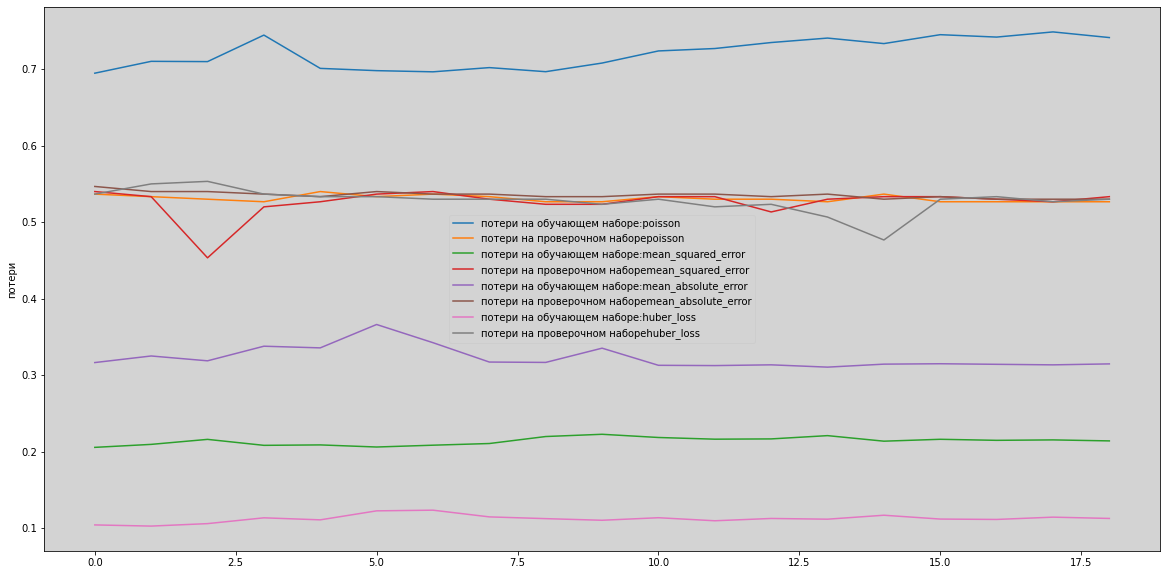

In [ ]:
epochs = 20
loss = keras.losses.CategoricalCrossentropy( from_logits=False )
loss_list = [keras.losses.Poisson(), keras.losses.MeanSquaredError(),keras.losses.MeanAbsoluteError(), keras.losses.Huber()]
plt.figure(figsize = (20,10))
for loss in loss_list:
  model = Sequential()

  model.add(LSTM(128, input_shape = (inputs.shape[1], inputs.shape[2]), return_sequences="True"))
  model.add(BatchNormalization())
  #model.add(LSTM(64, return_sequences="True")) # <None, 3,32>
  #model.add(Conv1D(64, 3, activation="relu")) #(None,3,64)
  model.add(Conv1D(64, 1, activation="linear"))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(BatchNormalization())
  model.add(Dense(n_class, activation="softmax"))

  model.compile(loss=loss, optimizer="adam", metrics=['accuracy'])#'categorical_crossentropy'

  history = model.fit(
      xTrain,yTrain,
      epochs=epochs,
      validation_data=(xVal,yVal))#,
  #    callbacks=[callback])


  plt.plot(history.history['val_loss'][1:],
         label='потери на обучающем наборе:'+loss.name)
  plt.plot(history.history['val_accuracy'][1:],
         label='потери на проверочном наборе'+loss.name)
plt.ylabel('потери')
plt.legend()
plt.show()

Выбрана MSE,т.к. наименее переучена

Epoch 1/20
49/49 [==============================] - 5s 24ms/step - loss: 0.2508 - accuracy: 0.4117 - val_loss: 0.2134 - val_accuracy: 0.5300
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2090 - accuracy: 0.4864 - val_loss: 0.2034 - val_accuracy: 0.5367
Epoch 3/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1959 - accuracy: 0.5383 - val_loss: 0.2092 - val_accuracy: 0.5367
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1890 - accuracy: 0.5565 - val_loss: 0.2060 - val_accuracy: 0.5367
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1808 - accuracy: 0.5630 - val_loss: 0.2062 - val_accuracy: 0.5367
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1722 - accuracy: 0.5805 - val_loss: 0.2360 - val_accuracy: 0.5367
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1696 - accuracy: 0.5727 - val_loss: 0.2272 - val_accuracy: 0.5233
Epoch 8/20
49

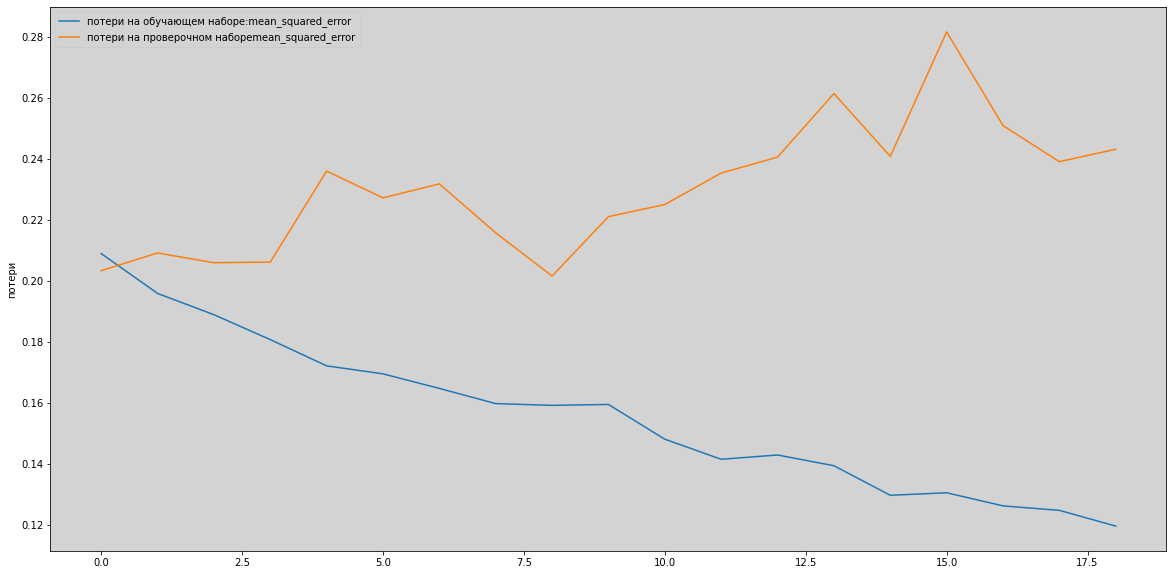

In [ ]:
epochs = 20
loss = keras.losses.CategoricalCrossentropy( from_logits=False )
loss_list = [keras.losses.MeanSquaredError()]
plt.figure(figsize = (20,10))
for loss in loss_list:
  model = Sequential()
  model.add(BatchNormalization(input_shape = (inputs.shape[1], inputs.shape[2])))
  model.add(LSTM(128, return_sequences="True"))
  model.add(BatchNormalization())
  #model.add(LSTM(64, return_sequences="True")) # <None, 3,32>
  #model.add(Conv1D(64, 3, activation="relu")) #(None,3,64)
  model.add(Conv1D(64, 3, activation="linear"))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(BatchNormalization())

  model.add(Dense(n_class, activation="softmax"))

  model.compile(loss=loss, optimizer="adam", metrics=['accuracy'])#'categorical_crossentropy'

  history = model.fit(
      xTrain,yTrain,
      epochs=epochs,
      validation_data=(xVal,yVal))#,
  #    callbacks=[callback])


  plt.plot(history.history['loss'][1:],
         label='потери на обучающем наборе:'+loss.name)
  plt.plot(history.history['val_loss'][1:],
         label='потери на проверочном наборе'+loss.name)
plt.ylabel('потери')
plt.legend()
plt.show()

Обучаем до раннего останова

In [ ]:
history1 = model.fit(
      xTrain,yTrain,
      epochs=100,
      validation_data=(xVal,yVal),callbacks=[calclbak])

Epoch 1/100
49/49 [==============================] - 1s 11ms/step - loss: 0.1173 - accuracy: 0.7532 - val_loss: 0.2357 - val_accuracy: 0.5233
Epoch 2/100
49/49 [==============================] - 1s 11ms/step - loss: 0.1087 - accuracy: 0.7630 - val_loss: 0.2560 - val_accuracy: 0.4767
Epoch 3/100
49/49 [==============================] - 1s 11ms/step - loss: 0.1061 - accuracy: 0.7675 - val_loss: 0.2310 - val_accuracy: 0.5000
Epoch 4/100
49/49 [==============================] - 1s 11ms/step - loss: 0.1016 - accuracy: 0.7851 - val_loss: 0.2606 - val_accuracy: 0.4633
Epoch 5/100
49/49 [==============================] - 1s 12ms/step - loss: 0.1025 - accuracy: 0.7779 - val_loss: 0.2955 - val_accuracy: 0.4200
Epoch 6/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0985 - accuracy: 0.7883 - val_loss: 0.2699 - val_accuracy: 0.4500


In [ ]:
Y = model.predict(xVal)

Визуализация результатов обучения:

In [ ]:
Y_sale_y = Y[:,0]
Y_bay_y = Y[:,1]
#Y_sale_a = Y[:,2]
#Y_bay_a = Y[:,3]

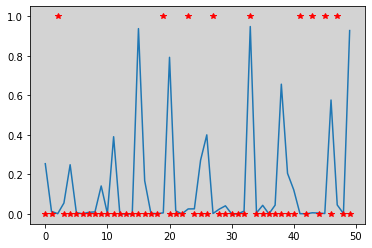

In [ ]:
plt.plot(Y_sale_y[:50], label = 'yandex sale val')
plt.plot(yVal[xLen-1:50+xLen-1,0], '*r')
plt.show()

Результаты по каждой модели выхода

0
1
2


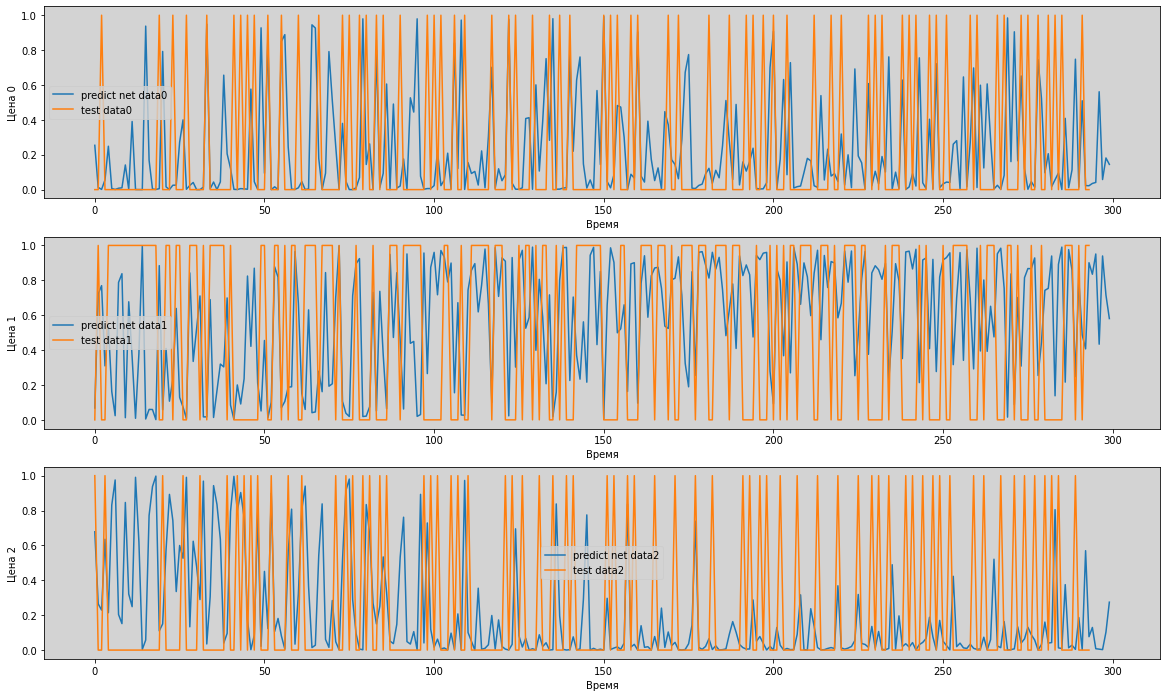

In [ ]:
yt=yVal[xLen-1:,:]

plt.figure( figsize=( 20, 4*n_class ))
for i in range(n_class):
  print(i)
  plt.subplot( n_class,1,i+1)
  plt.xlabel('Время')
  plt.ylabel('Цена '+str(i))
  plt.plot(Y[:,i], label='predict net data'+str(i) )
  plt.plot(yt[:,i], label='test data'+str(i))


  plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 8, 27)             108       
_________________________________________________________________
lstm_4 (LSTM)                (None, 8, 128)            79872     
_________________________________________________________________
batch_normalization_13 (Batc (None, 8, 128)            512       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 64)             24640     
_________________________________________________________________
batch_normalization_14 (Batc (None, 6, 64)             256       
_________________________________________________________________
flatten_4 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

Оценка доходности биржевого робота

In [ ]:
def bay_sale_under_trader(df=None,y=None, ya = None, data = None,name='',w = 30, delta = 0.001,xLen = 7, verbose = 1, V = 100, model = None, scx = None):
  if (data.shape[0]>0) and (df.shape[0]>0):
    x = data.values
    df['A1'] = y
    #df['A2'] = y

    if verbose:
      plt.figure(figsize=(16,16))
      plt.subplot(4,1,1)
      plt.plot(data.index,x, label = 'data')
      plt.grid('On')
      plt.title('курс '+ name)

      plt.legend()

    k = 0 # номер текушего начала позиции
    kc=0
    s = 0 # чило точек вперед по позициям
    all_sum = 0 #  общий доход

    Invest0 = V # начальная инвестиция
    Invest = Invest0 # текущий инвест счет
    Invest_c = Invest0 # текущий инвест счет
    logger_bay_sale = y[:,0]

    Profeat = Invest0 # доход
    Profeat_client = Invest0 # доход

    prof = []
    profc = []
    #print('sale :', k,'prof: ', Profeat)
    for i in range(df.shape[0] ):
      #print(i)
      diff_sum = Invest0/x[k]*(x[i])-Invest0
      diff_sumc = Invest0/x[kc]*(x[i])-Invest0
      if i > xLen+2:
        df_i = df.iloc[i-xLen-1:i-1,:]
        if i == 8:
          print(df_i.head())
        #df_is= scx.transform(df_i.iloc[:,:-2])
        #df_is = np.hstack([df_is, df_i.iloc[:,-2:].values])
        df_is = df_i.values
        if i == 8:
          print(df_is)
        df_i.values[:,:] = df_is
        #print(df_i.shape)
        y_class = model.predict(df_is.reshape((1,xLen,27)))
        y_class =  np.argmax(y_class) - 1
        if i < 10:
          print(y_class, logger_bay_sale[i])
        if (Invest_c==0) & (y_class == -1 )& (x[i]>0):
          Profeat_client = Profeat_client +  diff_sumc - delta*Invest0 #+Invest0
          #print('sale :', i,'prof: ', Profeat, logger_bay_sale[i])
          Invest_c = Invest0
          kc = i
        if (Invest_c>0) & (y_class == 1 )& (kc != i):
          Profeat_client = Profeat_client
          kc =i
          Invest_c = 0
        if (Invest_c>0)  & (y_class == 0)& (k != i) & (x[i]>0):
          #print('no bay :', k)
          kc = i


      #print(k,i, delta*Invest0*diff_sum, Invest,Profeat)
      if (Invest==0) & (logger_bay_sale[i] == -1 )& (x[i]>0):

        Profeat = Profeat +  diff_sum - delta*Invest0 #+Invest0



        #print('sale :', i,'prof: ', Profeat, logger_bay_sale[i])
        Invest = Invest0
        k = i


      if (Invest>0)  & (logger_bay_sale[i] == 0)& (k != i) & (x[i]>0):
        #print('no bay :', k)
        k = i


      if (Invest>0) & (k != i) & (logger_bay_sale[i] == 1) & (x[i]>0):

        Profeat = Profeat # - Invest0

        #print('bay: ',i,'prof: ', Profeat, logger_bay_sale[i])

        k = i
        Invest = 0



      prof.append([i,Profeat])
      profc.append([i,Profeat_client])


    prof = np.array(prof)
    profc = np.array(profc)
    #print(profc[:,1].shape,data.index.shape)

    if verbose:
      plt.subplot(4,1,2)

      plt.plot(data.index, prof[:,1] , "-b", label = 'доход трейдера')
      plt.plot(data.index, profc[:,1] , "-r", label = 'доход клиента')#
      plt.legend()
      plt.grid('On')
      plt.title('общий доход трейдера/клиента')


      dprof = prof[1:,1]-prof[:-1,1]
      dprofс = profc[1:,1]-profc[:-1,1]
      dprof = pd.DataFrame(data = dprof, index =data.index[:-1], columns = ['prof'] )
      dprofс = pd.DataFrame(data = dprofс, index =data.index[:-1], columns = ['prof'] )
      dprof['w7'] = dprof['prof'].rolling(7).sum()
      dprof['w7_std'] = dprof['prof'].rolling(7).std()
      dprofс['w7'] = dprofс['prof'].rolling(7).sum()
      dprofс['w7_std'] = dprofс['prof'].rolling(7).std()

      plt.subplot(4,1,4)
      plt.grid('On')
      plt.plot(data.index[:-1], dprof['prof']  , "-r", label = 'доход на каждой операции')
      plt.plot(data.index[:-1], dprof['w7']  , "-b", label = 'доход на неделе')
      plt.plot(data.index[:-1], dprof['w7'] + dprof['w7_std']  , "-g", label = 'разброс доход на неделе')
      plt.plot(data.index[:-1], dprof['w7'] - dprof['w7_std']  , "-g")
      plt.fill_between(data.index[:-1], dprof['w7'] - dprof['w7_std'], dprof['w7'] + dprof['w7_std'], alpha=0.5)
      plt.title('Статистические оценки работы трейдера')
      plt.legend()

      plt.subplot(4,1,3)
      plt.grid('On')
      plt.plot(data.index[:-1], dprofс['prof']  , "-r", label = 'доход на каждой операции')
      plt.plot(data.index[:-1], dprofс['w7']  , "-b", label = 'доход на неделе')
      plt.plot(data.index[:-1], dprofс['w7'] + dprofс['w7_std']  , "-g", label = 'разброс доход на неделе')
      plt.plot(data.index[:-1], dprofс['w7'] - dprofс['w7_std']  , "-g")
      plt.fill_between(data.index[:-1], dprofс['w7'] - dprofс['w7_std'], dprofс['w7'] + dprofс['w7_std'], alpha=0.5)
      plt.title('Статистические оценки работы клиента')

      #plt.plot(data.index[peaks_all[:-1]], dprof['w7_std']  , "-k")

      plt.legend()
      plt.show()


    if verbose:
      plt.show()
      print('Доход трейдера за период c ',data.index[0],' по ',data.index[1],': ', prof[-1,1]-Invest0, '%')
      print('Доход клиента за период c ',data.index[0],' по ',data.index[1],': ', profc[-1,1]-Invest0, '%')


    return   prof, profc

Оценим доход на отрезке от n1 до n2

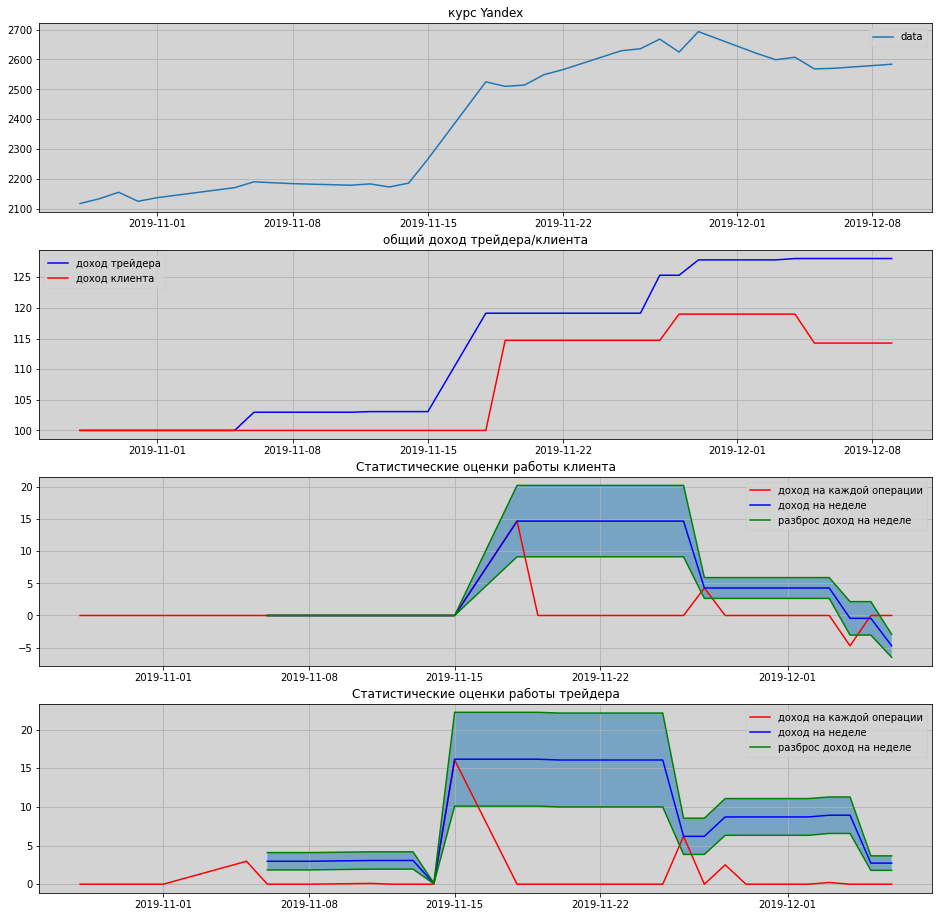

Доход трейдера за период c  2019-10-28 00:00:00  по  2019-10-29 00:00:00 :  28.058307192264834 %
Доход клиента за период c  2019-10-28 00:00:00  по  2019-10-29 00:00:00 :  14.256539957042577 %


In [ ]:
xLen = 8
n1 = -500
n2 = (n1 + 30)
Pideal,P = bay_sale_under_trader(df=data.iloc[n1:n2,:],y=y[n1:n2], ya = y[n1:n2], name ='Yandex', data = data['YNDX.ME'].iloc[n1:n2],w = 30, xLen = xLen, delta = 0.001, verbose = 1, V = 100, model = model, scx = scx)


Реакции модели и идеального трейдера по времени на валидации

In [ ]:
yp=model.predict(xVal[:50,:,:])

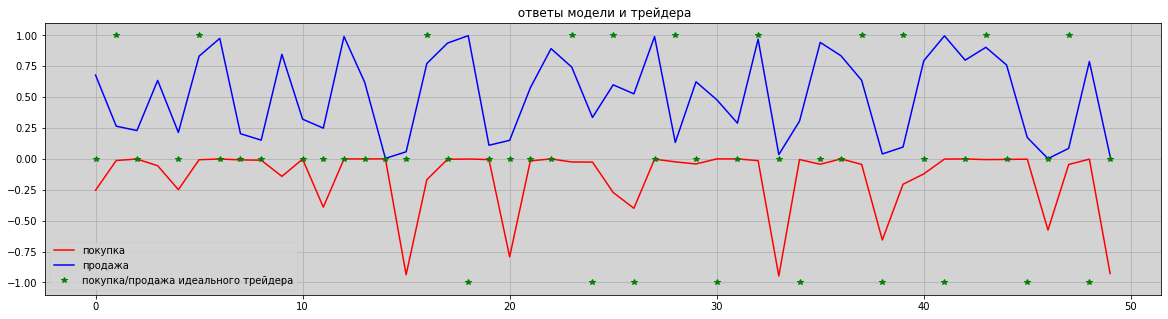

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(-yp[:,0],'-r', label = 'покупка')
plt.plot(yp[:,2],'-b', label = 'продажа')
plt.plot(y[0:50,0],'*g', label = 'покупка/продажа идеального трейдера')
plt.grid(True)
plt.title(' ответы модели и трейдера')
plt.legend()
plt.show()

## Анализ результатов

  - "Идеальный трейдер" приносит постоянный доход - модель "Идеального трейдера" рабочая
  - 'Идеальный трейдер' не работает в стратегиях понижения (нгужно строить модель обработки этих случаев)
  - Проверены модели : линейная, GBoost, LSTM - выбрали модель на нейронной сети
  - Обучена финальная модель на нейросети
  - Проведена оценка доходности по отношению к "идеальному трейдеру" на отрезках 30 дней работы : оценки от -10% до +50% от дохода "идеального трейдера". Средняя оценка +15% от дохода трейдера


  - Можно добавить события, новости, еще индикаторов
